###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

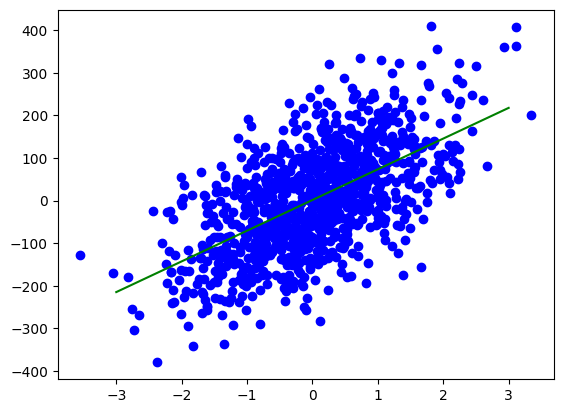

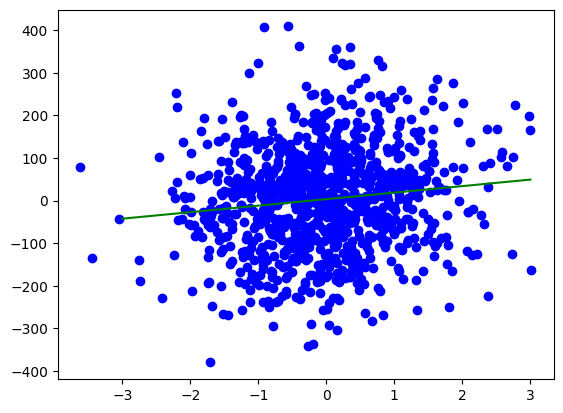

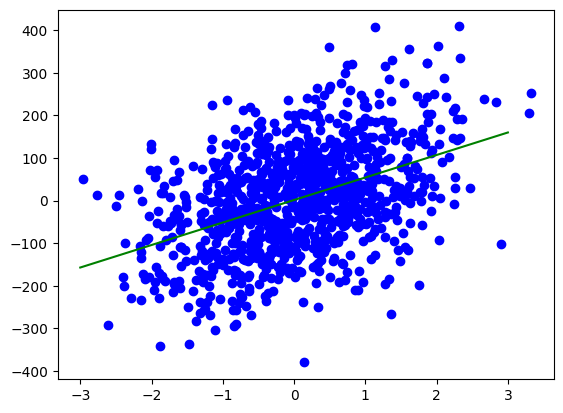

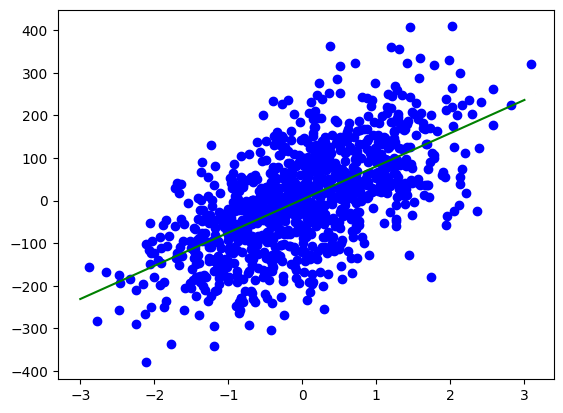

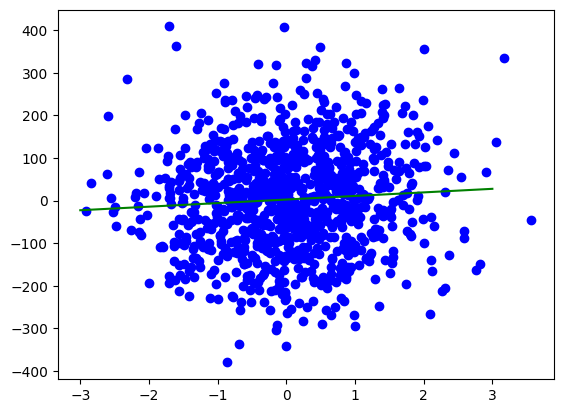

In [27]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression as mr
from sklearn.linear_model import LinearRegression
import numpy as np


X, y = mr(n_samples=1000, n_features=5, noise=0)

for i in range(5):
    plt.scatter(X[:, i], y, color='blue')
    model = LinearRegression()
    model.fit(X[:, i].reshape(-1, 1), y)
    x_new = np.linspace(-3, 3, 40)
    y_new = model.predict(x_new[:, np.newaxis])
    plt.plot(x_new, y_new, color='green')
    plt.show()


### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

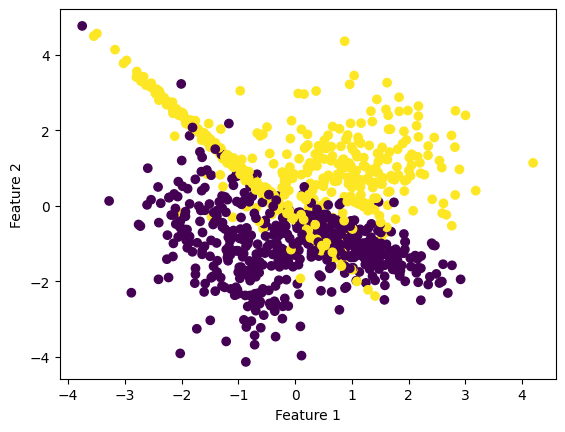

In [56]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

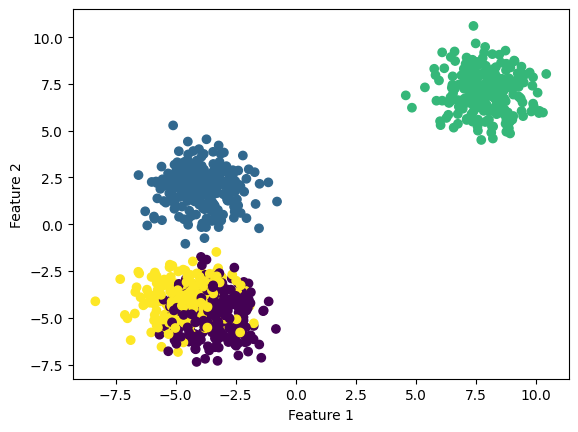

In [57]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, n_features=2)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [42]:
import requests as req
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.worldometers.info/coronavirus/'
page = req.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

table = soup.find('table', id='main_table_countries_today')
headers = []
first_row = table.find('tr')

for i in first_row.find_all('th'):
    title = i.text
    headers.append(title)

mydata = pd.DataFrame(columns=headers)
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row

mydata.drop(mydata.columns[[0, 9, 10, 11, 12, 13, 14,
            15, 16, 17, 18, 19, 20, 21]], axis=1, inplace=True)

mydata1 = mydata.loc[0:238]
print(mydata1)


         Country,Other   TotalCases NewCases   
0    \nNorth America\n  126,645,285           \
1             \nAsia\n  217,257,798       +2   
2           \nEurope\n  249,247,411            
3    \nSouth America\n   68,671,718            
4          \nOceania\n   14,309,481            
..                 ...          ...      ...   
234       Vatican City           29            
235     Western Sahara           10            
236         MS Zaandam            9            
237            Tokelau            5            
238              China      503,302            

                               TotalDeaths NewDeaths TotalRecovered   
0                                1,632,533              122,485,634  \
1                                1,546,102              200,958,320   
2                                2,059,481              245,188,803   
3                                1,355,254               66,459,408   
4                                   27,779               14,137,845 

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Counter({0: 950, 1: 50})


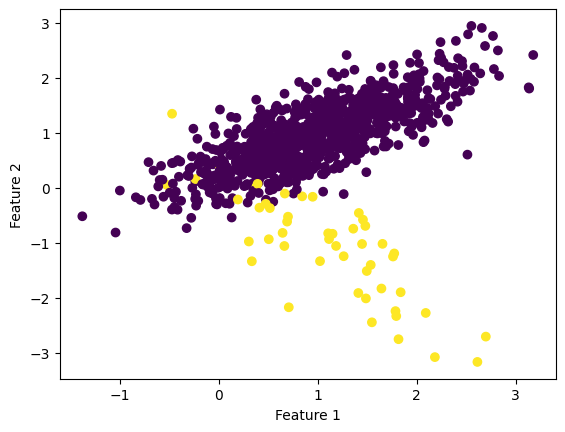

Counter({0: 950, 1: 250})


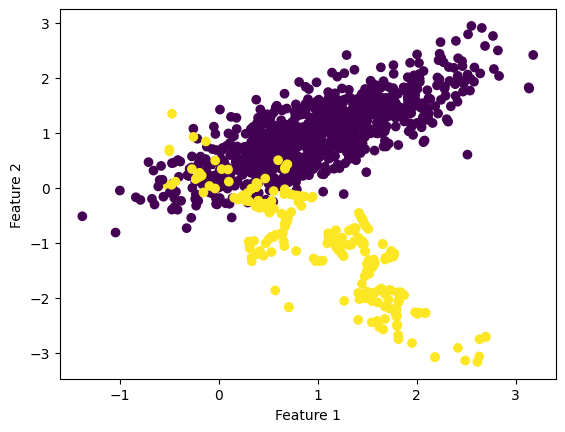

Counter({0: 750, 1: 250})


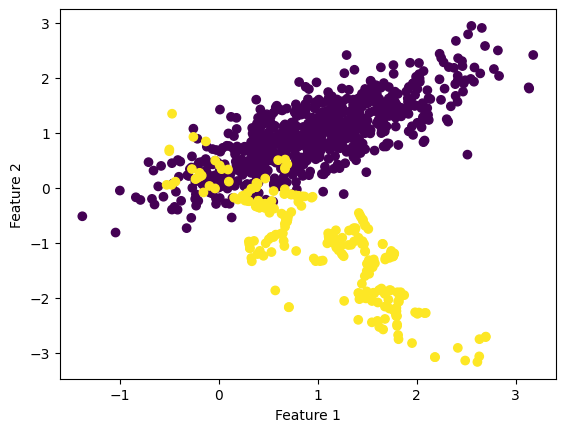

In [87]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from numpy import where
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

oversample = SMOTE(sampling_strategy=0.2632)
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

undersample = RandomUnderSampler(sampling_strategy=0.3333)
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [104]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

# df.info()
# no missing values found

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("\nDimensions of training set", X_train.shape)
print("Dimensions of testing set", X_test.shape, "\n")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_train = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
print(df_train.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dimensions of training set (105, 4)
Dimensions of testing set (45, 4) 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           1.891901         -0.536856           1.317466          0.938646
1          -0.131492         -0.536856           0.416268          0.142755
2           2.248971         -1.012552           1.768065          1.469240
3           0.701670         -0.774704           0.866867          0.938646
4          -0.369539          1.128078          -1.386129         -1.316379
